In [4]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from eofs.xarray import Eof
from eofs.examples import example_data_path

In [5]:
# Read SST anomalies using the xarray module. The file contains November-March
# averages of SST anomaly in the central and northern Pacific.
filename = example_data_path('sst_ndjfm_anom.nc')
sst = xr.open_dataset(filename)['sst']

sst

<xarray.DataArray 'sst' (time: 50, latitude: 18, longitude: 30)>
array([[[ 4.318080e-01,           nan, ..., -5.099366e-04, -6.166888e-02],
        [ 3.851656e-02,  1.042517e-01, ..., -1.178146e-01, -1.578676e-01],
        ...,
        [          nan,           nan, ...,           nan,           nan],
        [          nan,           nan, ...,           nan,           nan]],

       [[ 2.928355e-01,           nan, ..., -3.901250e-01, -5.419934e-01],
        [ 1.990132e-01,  6.390592e-01, ..., -1.983026e-01, -3.549605e-01],
        ...,
        [          nan,           nan, ...,           nan,           nan],
        [          nan,           nan, ...,           nan,           nan]],

       ...,

       [[ 7.829272e-01,           nan, ..., -1.392927e+00, -1.070007e+00],
        [ 4.601060e-01,  2.474768e-01, ..., -7.000861e-01, -7.082649e-01],
        ...,
        [          nan,           nan, ...,           nan,           nan],
        [          nan,           nan, ...,           

In [6]:
# Create an EOF solver to do the EOF analysis. Square-root of cosine of
# latitude weights are applied before the computation of EOFs.
coslat = np.cos(np.deg2rad(sst.coords['latitude'].values))
wgts = np.sqrt(coslat)[..., np.newaxis]
solver = Eof(sst, weights=wgts)

solver

In [8]:
# Retrieve the leading EOF, expressed as the correlation between the leading
# PC time series and the input SST anomalies at each grid point, and the
# leading PC time series itself.
eof1 = solver.eofsAsCorrelation(neofs=1)
pc1 = solver.pcs(npcs=1, pcscaling=1)

eof1

<xarray.DataArray 'eofs' (mode: 1, latitude: 18, longitude: 30)>
array([[[-0.334557,       nan, ...,  0.404368,  0.373819],
        [-0.090186,  0.139536, ...,  0.556781,  0.516338],
        ...,
        [      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]]])
Coordinates:
  * mode       (mode) int64 0
  * latitude   (latitude) float32 -22.5 -17.5 -12.5 -7.5 ... 47.5 52.5 57.5 62.5
  * longitude  (longitude) float32 117.5 122.5 127.5 132.5 ... 252.5 257.5 262.5
Attributes:
    long_name:  correlation_between_pcs_and_sst

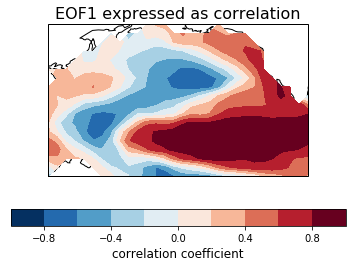

In [9]:
# Plot the leading EOF expressed as correlation in the Pacific domain.
clevs = np.linspace(-1, 1, 11)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=190))
fill = eof1[0].plot.contourf(ax=ax, levels=clevs, cmap=plt.cm.RdBu_r,
                             add_colorbar=False, transform=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, facecolor='w', edgecolor='k')
cb = plt.colorbar(fill, orientation='horizontal')
cb.set_label('correlation coefficient', fontsize=12)
ax.set_title('EOF1 expressed as correlation', fontsize=16)

plt.show()

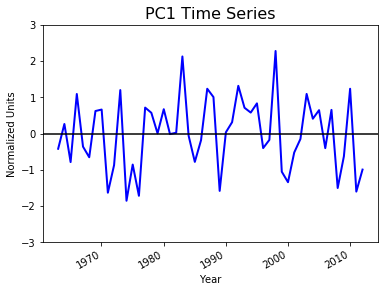

In [10]:
# Plot the leading PC time series.
plt.figure()
pc1[:, 0].plot(color='b', linewidth=2)
ax = plt.gca()
ax.axhline(0, color='k')
ax.set_ylim(-3, 3)
ax.set_xlabel('Year')
ax.set_ylabel('Normalized Units')
ax.set_title('PC1 Time Series', fontsize=16)

plt.show()